In [1]:
# Évolution des performances cognitives et des structures neuromorphologiques entre BL et V08 pour les patients ayant un quip 

In [20]:
pip install --upgrade pingouin

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas
import numpy as np

In [22]:
ppmi = pandas.read_csv('C:\\Users\\p_lor\\Dropbox\\proj_Park_Lucas\\materials\\PPMI_April2020\\PPMI_Original_Cohort_BL_to_Year_5_Dataset_Apr2020.csv')

In [23]:
mri = pandas.read_excel('C:\\Users\\p_lor\\Dropbox\\proj_Park_Lucas\\materials\\stats_fs_all.xlsx')

In [24]:
# merge données mri et les données NPS et NPsy
mri['PATNO'] = mri.PATNO.str.replace('PPMI_' , '')
mri[['ID','EVENT_ID']] = mri['PATNO'].str.split("_",expand=True)

mri = mri.drop(['PATNO', 'Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
mri.rename(columns = {'ID':'PATNO'}, inplace = True)

mri = mri.replace({'EVENT_ID':{'ses-01':'BL', 'ses-1':'BL', 'ses-2':'V04', 'ses-3':'V06', 'ses-4':'V08', 'ses-5':'V10'}})

In [25]:
ppmi['PATNO']=ppmi['PATNO'].astype(int)
mri['PATNO']=mri['PATNO'].astype(int)

ppmi_mri = pandas.merge(ppmi, mri, on=["PATNO", "EVENT_ID"])

In [26]:
#enlever les SWEDD du database
ppmi_mri = ppmi_mri.drop(ppmi_mri[ppmi_mri['APPRDX'] == 3].index)

In [27]:
ppmi_mri = ppmi_mri.drop(ppmi_mri[(ppmi_mri['primdiag'] != 1) & (ppmi_mri['primdiag'] != 17)].index)

In [9]:
ppmi_mri['primdiag'].value_counts()

1.0     590
17.0    204
Name: primdiag, dtype: int64

In [28]:
import pingouin as pg

In [29]:
#garder seulement les parkinsoniens
pd = ppmi_mri.drop(ppmi_mri[ppmi_mri['APPRDX'] != 1].index, inplace = False)

In [30]:
#créer dataframe avec participants qui ont des données mri à BL et à v08
pd_bl = pd.drop(pd[pd['EVENT_ID'] != 'BL'].index, inplace = False)
pd_v08 = pd.drop(pd[pd['EVENT_ID'] != 'V08'].index, inplace = False) 
pd_bl = pd_bl.drop_duplicates(subset = 'PATNO', keep = 'first', ignore_index = True)
pd_v08 = pd_v08.drop_duplicates(subset = 'PATNO', keep = 'first', ignore_index = True)

In [31]:
pd_bl_v08 = pandas.concat([pd_bl, pd_v08], ignore_index = True)

In [32]:
pd_bl_v08['duplicated'] = pd_bl_v08.duplicated(subset = 'PATNO', keep = False)

In [33]:
pd_bl_v08 = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['duplicated'] != True].index)

In [17]:
#pd_bl_1 = pd_bl_v08.iloc[:58]
#pd_v08_1 = pd_bl_v08.iloc[58:]

In [20]:
#pd_bl_v08_npsy = pd_bl_1.merge(pd_v08_1, on = 'PATNO')

In [34]:
# nb participants dans chaque groupe à la baseline
BL = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'BL'].index, inplace = False)
BL['EVENT_ID'].value_counts()
BL['quip_any'].value_counts()

0.0    46
1.0    12
Name: quip_any, dtype: int64

In [35]:
# nb participants dans chaque groupe à 3 ans
V08 = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'V08'].index, inplace = False)
V08['EVENT_ID'].value_counts()
V08['quip_any'].value_counts()

0.0    39
1.0    19
Name: quip_any, dtype: int64

In [36]:
# régler bug des premières colonnes des données mri
pd_bl_v08 = pd_bl_v08.replace('SCP', )
pd_bl_v08['midbrain_Brainstem'] = pd_bl_v08['midbrain_Brainstem'].astype(float)

In [37]:
pd_bl_v08 = pd_bl_v08.replace('segmentBS.sh', )
pd_bl_v08['medulla_Brainstem'] = pd_bl_v08['medulla_Brainstem'].astype(float)

In [38]:
pd_bl_v08 = pd_bl_v08.replace('Medulla', )
pd_bl_v08['pons_Brainstem'] = pd_bl_v08['pons_Brainstem'].astype(float)

In [39]:
pd_bl_v08 = pd_bl_v08.replace('Pons', )
pd_bl_v08['scp_Brainstem'] = pd_bl_v08['scp_Brainstem'].astype(float)

In [40]:
pd_bl_v08 = pd_bl_v08.replace('Midbrain', )
pd_bl_v08['wholeBrainstem_Brainstem'] = pd_bl_v08['wholeBrainstem_Brainstem'].astype(float)

In [50]:
pd_bl_v08.to_excel('C:\\Users\\p_lor\\OneDrive\\Bureau\\IUGM\\QUIPAD\\pd_bl_v08.xlsx')

In [ ]:
#postulats de l'ANOVA mixte
#vérifier la normalié
#kurtosis +/-1
#skewness +/-1

In [60]:
for i in result_interaction:
    kurt = pd_bl_v08[i][pd_bl_v08['EVENT_ID'] == 'BL'].kurtosis(axis = 0, skipna = True)
    print(kurt, i)

1.2187187469776304 Lateral-nucleus_AMYR
1.3265181418659844 Basal-nucleus_AMYR
-0.40825753237636375 Anterior-amygdaloid-area-AAA_AMYR
0.8120702331881251 Corticoamygdaloid-transitio_AMYR
0.9338152659950087 WholeAmygdala_AMYR
0.08024777136635475 Pt_THAL
0.6836100214346157 VM_THAL
2.0108342472320166 volBrainSegtoeTIV_VolSeg
2.7347502382066122 cingulate_isthmus_AreaL_DK
-0.5666830088769768 temporal_parahippocampal_AreaL_DK
-0.070220890194582 occipital_lingual_VolL_DK
2.460481337360401 temporal_parahippocampal_CurvL_DK
0.23647837273318073 cingulate_isthmus_FoldIndL_DK
7.518173812713735 temporal_parahippocampal_FoldIndL_DK
0.5912423407232832 cortex_area_AreaR_DK
-0.5042245589649079 temporal_middle_VolR_DK
0.8956972296121184 temporal_superior_VolR_DK
0.5391422183494923 insula_VolR_DK
-0.13775798664980776 cingulate_anterior_caudal_FoldIndR_DK
2.0470957209547813 parietal_precuneus_FoldIndR_DK


In [59]:
for column in neuropsy:
    kurt = pd_bl_v08[column][pd_bl_v08['EVENT_ID'] == 'BL'].kurtosis(axis = 0, skipna = True)
    print(kurt, column)

0.056731615469094 bjlot
1.8923723253780236 hvlt_discrimination
-0.04289758530856158 hvlt_immediaterecall
0.7343009194802828 hvlt_retention
1.1210937121586677 HVLTFPRL
0.08563407591936079 HVLTRDLY
1.4842426010810805 HVLTREC
1.0112364806401009 lns
0.5082264534378544 moca
-0.9575084200526223 MSEADLG
0.4332191573131223 SDMTOTAL
0.25469813860211943 sft
-0.4889428871985544 VLTANIM
-0.4392074769492722 VLTFRUIT
-0.01843643096363401 VLTVEG


In [58]:
for i in result_interaction:
    skew = pd_bl_v08[i][pd_bl_v08['EVENT_ID'] == 'BL'].skew(axis = 0, skipna = True)
    print(skew, i)

1.0312491886454056 Lateral-nucleus_AMYR
0.7479217887176856 Basal-nucleus_AMYR
-0.18314827801290134 Anterior-amygdaloid-area-AAA_AMYR
0.4003841441631969 Corticoamygdaloid-transitio_AMYR
0.8049460026564553 WholeAmygdala_AMYR
0.4750747745232689 Pt_THAL
1.000942544472992 VM_THAL
0.9019875288934647 volBrainSegtoeTIV_VolSeg
1.3389861927349962 cingulate_isthmus_AreaL_DK
0.08776709515977565 temporal_parahippocampal_AreaL_DK
0.1252675027879493 occipital_lingual_VolL_DK
1.342577691504642 temporal_parahippocampal_CurvL_DK
0.5487316718307106 cingulate_isthmus_FoldIndL_DK
2.1358252256111 temporal_parahippocampal_FoldIndL_DK
0.3361434964554966 cortex_area_AreaR_DK
-0.021396643640926066 temporal_middle_VolR_DK
0.6013538268541926 temporal_superior_VolR_DK
0.4621743376833023 insula_VolR_DK
0.2872145943196459 cingulate_anterior_caudal_FoldIndR_DK
1.046403467487454 parietal_precuneus_FoldIndR_DK


In [57]:
for column in neuropsy:
    skew = pd_bl_v08[column][pd_bl_v08['EVENT_ID'] == 'BL'].skew(axis = 0, skipna = True)
    print(skew, column)

-0.9793917886253278 bjlot
-1.6807886141831763 hvlt_discrimination
-0.3674088743003883 hvlt_immediaterecall
-0.8776473802298908 hvlt_retention
1.316061757193634 HVLTFPRL
-0.613801341580833 HVLTRDLY
-1.5522023272589145 HVLTREC
0.17575392855757105 lns
-0.7553872503667243 moca
-0.40253830801438073 MSEADLG
-0.4754073012092137 SDMTOTAL
0.49983962143679367 sft
0.013998842802870257 VLTANIM
0.3624073823724566 VLTFRUIT
0.7349257027246174 VLTVEG


In [56]:
for i in result_interaction:
    kurt = pd_bl_v08[i][pd_bl_v08['EVENT_ID'] == 'V08'].kurtosis(axis = 0, skipna = True)
    print(kurt, i)

0.6022497587754425 Lateral-nucleus_AMYR
0.3278476272876314 Basal-nucleus_AMYR
1.2617953200991212 Anterior-amygdaloid-area-AAA_AMYR
1.088122256042594 Corticoamygdaloid-transitio_AMYR
0.5374327585467076 WholeAmygdala_AMYR
-0.39742931728477426 Pt_THAL
1.369137926775831 VM_THAL
-0.43058292486228567 volBrainSegtoeTIV_VolSeg
3.09896826403228 cingulate_isthmus_AreaL_DK
6.6740304143136076 temporal_parahippocampal_AreaL_DK
0.07656575915158914 occipital_lingual_VolL_DK
0.000727010685945384 temporal_parahippocampal_CurvL_DK
1.524694268913065 cingulate_isthmus_FoldIndL_DK
2.1735864239650273 temporal_parahippocampal_FoldIndL_DK
0.3043203811487696 cortex_area_AreaR_DK
0.051695214798706424 temporal_middle_VolR_DK
1.3634626348365262 temporal_superior_VolR_DK
1.8631881876679741 insula_VolR_DK
-0.7503764005715898 cingulate_anterior_caudal_FoldIndR_DK
-0.030920011649534285 parietal_precuneus_FoldIndR_DK


In [55]:
for column in neuropsy:
    kurt = pd_bl_v08[column][pd_bl_v08['EVENT_ID'] == 'V08'].kurtosis(axis = 0, skipna = True)
    print(kurt, column)

0.033038840693848215 bjlot
7.651401661018916 hvlt_discrimination
-0.4288833074715286 hvlt_immediaterecall
4.048479856901093 hvlt_retention
-0.07811550123430244 HVLTFPRL
0.18814981050933977 HVLTRDLY
13.070229452068991 HVLTREC
0.40191467383028145 lns
-0.7587166673927488 moca
1.9108247441199882 MSEADLG
-0.556872570911763 SDMTOTAL
-0.6673097520480868 sft
0.12073933654020985 VLTANIM
-0.3647977597314789 VLTFRUIT
-0.40922104212928767 VLTVEG


In [61]:
for i in result_interaction:
    skew = pd_bl_v08[i][pd_bl_v08['EVENT_ID'] == 'V08'].skew(axis = 0, skipna = True)
    print(skew, i)

0.532444177284084 Lateral-nucleus_AMYR
0.34998513532816006 Basal-nucleus_AMYR
0.04732289722915335 Anterior-amygdaloid-area-AAA_AMYR
0.7509212695458589 Corticoamygdaloid-transitio_AMYR
0.5857657619555305 WholeAmygdala_AMYR
0.42434145855993705 Pt_THAL
0.995418107340135 VM_THAL
-0.0932792727786723 volBrainSegtoeTIV_VolSeg
1.449483438673039 cingulate_isthmus_AreaL_DK
1.882883282486194 temporal_parahippocampal_AreaL_DK
0.4019393090734397 occipital_lingual_VolL_DK
0.6326889533848356 temporal_parahippocampal_CurvL_DK
1.1514476174365205 cingulate_isthmus_FoldIndL_DK
1.2866286172861516 temporal_parahippocampal_FoldIndL_DK
0.41473741483661747 cortex_area_AreaR_DK
0.24809827096812342 temporal_middle_VolR_DK
0.5823418001649586 temporal_superior_VolR_DK
0.8565186623091716 insula_VolR_DK
0.33919189837853597 cingulate_anterior_caudal_FoldIndR_DK
0.5049447930200676 parietal_precuneus_FoldIndR_DK


In [62]:
for column in neuropsy:
    skew = pd_bl_v08[column][pd_bl_v08['EVENT_ID'] == 'V08'].skew(axis = 0, skipna = True)
    print(skew, column)

-0.897484621954008 bjlot
-2.415054983579034 hvlt_discrimination
-0.49255883505172854 hvlt_immediaterecall
-1.634625150812776 hvlt_retention
0.8852484202076021 HVLTFPRL
-0.8843427867297992 HVLTRDLY
-3.388461644261532 HVLTREC
0.4824520202027787 lns
-0.5790898289432347 moca
-1.1912589836229046 MSEADLG
-0.26622025901609225 SDMTOTAL
0.1755174114831228 sft
0.5204916773692646 VLTANIM
0.16102806599655212 VLTFRUIT
0.14893383622644524 VLTVEG


In [64]:
for i in result_interaction:
    skew = pd_bl_v08[i][pd_bl_v08['quip_any'] == 0].skew(axis = 0, skipna = True)
    print(skew, i)

0.635012898532482 Lateral-nucleus_AMYR
0.4376569895849898 Basal-nucleus_AMYR
-0.5569648026704861 Anterior-amygdaloid-area-AAA_AMYR
0.5208121913582728 Corticoamygdaloid-transitio_AMYR
0.5473869747154325 WholeAmygdala_AMYR
0.107743777366816 Pt_THAL
0.8006971233816101 VM_THAL
0.5522908051011419 volBrainSegtoeTIV_VolSeg
1.2690300444904243 cingulate_isthmus_AreaL_DK
0.09748806344498599 temporal_parahippocampal_AreaL_DK
0.03254601134085567 occipital_lingual_VolL_DK
0.9532356204886405 temporal_parahippocampal_CurvL_DK
0.6273331153455806 cingulate_isthmus_FoldIndL_DK
2.114653311140188 temporal_parahippocampal_FoldIndL_DK
-0.06460438616045092 cortex_area_AreaR_DK
-0.10714651238014326 temporal_middle_VolR_DK
0.07421605117450747 temporal_superior_VolR_DK
0.15162106798544706 insula_VolR_DK
0.4954974796775695 cingulate_anterior_caudal_FoldIndR_DK
0.4955111633789247 parietal_precuneus_FoldIndR_DK


In [63]:
for column in neuropsy:
    skew = pd_bl_v08[column][pd_bl_v08['quip_any'] == 0].skew(axis = 0, skipna = True)
    print(skew, column)

-0.948002177657217 bjlot
-2.049666961120797 hvlt_discrimination
-0.5064189644318517 hvlt_immediaterecall
-0.4898991335051594 hvlt_retention
1.9216269751736768 HVLTFPRL
-0.5319793217260049 HVLTRDLY
-3.51209916478362 HVLTREC
0.2953469267143197 lns
-0.932873105606334 moca
-1.0744385862221948 MSEADLG
-0.22129927507487723 SDMTOTAL
0.47535074020454815 sft
0.4093478514535203 VLTANIM
0.2398866178660305 VLTFRUIT
0.5831298250389956 VLTVEG


In [66]:
for i in result_interaction:
    kurt = pd_bl_v08[i][pd_bl_v08['quip_any'] == 0].kurtosis(axis = 0, skipna = True)
    print(kurt, i)

0.8205510255261883 Lateral-nucleus_AMYR
0.7485453964578324 Basal-nucleus_AMYR
0.2907529783271494 Anterior-amygdaloid-area-AAA_AMYR
0.8131550962225336 Corticoamygdaloid-transitio_AMYR
0.6543588866105727 WholeAmygdala_AMYR
-0.6229457512755001 Pt_THAL
0.6025626147168648 VM_THAL
1.4577101693399306 volBrainSegtoeTIV_VolSeg
2.6972104117633013 cingulate_isthmus_AreaL_DK
-0.4722135943795909 temporal_parahippocampal_AreaL_DK
-0.2427219339492792 occipital_lingual_VolL_DK
0.8568895683196076 temporal_parahippocampal_CurvL_DK
0.7549465883990867 cingulate_isthmus_FoldIndL_DK
8.398269002319887 temporal_parahippocampal_FoldIndL_DK
-0.862068131679997 cortex_area_AreaR_DK
-0.6968073459125126 temporal_middle_VolR_DK
-0.30101279315380847 temporal_superior_VolR_DK
0.014719996151067338 insula_VolR_DK
-0.12436754500870961 cingulate_anterior_caudal_FoldIndR_DK
0.07849151641762031 parietal_precuneus_FoldIndR_DK


In [67]:
for column in neuropsy:
    kurt = pd_bl_v08[column][pd_bl_v08['quip_any'] == 0].kurtosis(axis = 0, skipna = True)
    print(kurt, column)

0.1438097481088021 bjlot
3.9169645512189626 hvlt_discrimination
0.09918674470615674 hvlt_immediaterecall
-0.018217963011010863 hvlt_retention
3.682253093078049 HVLTFPRL
-0.2077107647572598 HVLTRDLY
18.065205532854158 HVLTREC
0.7390983033317493 lns
0.34820530379316805 moca
1.8312516536927013 MSEADLG
-0.5129618379686027 SDMTOTAL
0.25941100926014604 sft
0.13020507023833217 VLTANIM
-0.6095793910648308 VLTFRUIT
0.39115707709189573 VLTVEG


In [68]:
for i in result_interaction:
    skew = pd_bl_v08[i][pd_bl_v08['quip_any'] == 1].skew(axis = 0, skipna = True)
    print(skew, i)

0.7286451352491157 Lateral-nucleus_AMYR
0.48621519843908406 Basal-nucleus_AMYR
1.296203810629092 Anterior-amygdaloid-area-AAA_AMYR
0.741772064270093 Corticoamygdaloid-transitio_AMYR
0.7714061369695899 WholeAmygdala_AMYR
1.133934864642422 Pt_THAL
1.3709226573038646 VM_THAL
-0.13801896224401006 volBrainSegtoeTIV_VolSeg
1.55538827254081 cingulate_isthmus_AreaL_DK
1.5719231417664488 temporal_parahippocampal_AreaL_DK
0.7861195394964748 occipital_lingual_VolL_DK
0.7904074717239052 temporal_parahippocampal_CurvL_DK
1.1142259950929043 cingulate_isthmus_FoldIndL_DK
1.158421324438061 temporal_parahippocampal_FoldIndL_DK
1.1839460814394802 cortex_area_AreaR_DK
0.5566677565524291 temporal_middle_VolR_DK
1.5349444782511266 temporal_superior_VolR_DK
1.3007380591595694 insula_VolR_DK
-0.16351021918595315 cingulate_anterior_caudal_FoldIndR_DK
1.0962112208818648 parietal_precuneus_FoldIndR_DK


In [69]:
for column in neuropsy:
    skew = pd_bl_v08[column][pd_bl_v08['quip_any'] == 1].skew(axis = 0, skipna = True)
    print(skew, column)

-1.0239551281164994 bjlot
-2.0305042284546935 hvlt_discrimination
-0.21661291301065747 hvlt_immediaterecall
-1.3841027155397876 hvlt_retention
0.528474127721386 HVLTFPRL
-0.7093230194646437 HVLTRDLY
-4.054800586265331 HVLTREC
0.3939356256397421 lns
-0.2663400149198114 moca
-0.9240131747724378 MSEADLG
-0.7403580200818557 SDMTOTAL
0.010346897899028247 sft
-0.04157619408527729 VLTANIM
0.4469849937968945 VLTFRUIT
0.24170191608387637 VLTVEG


In [71]:
for i in result_interaction:
    kurt = pd_bl_v08[i][pd_bl_v08['quip_any'] == 1].kurtosis(axis = 0, skipna = True)
    print(kurt, i)

0.4495068127976931 Lateral-nucleus_AMYR
-0.0182241435343804 Basal-nucleus_AMYR
1.3451381188729572 Anterior-amygdaloid-area-AAA_AMYR
-0.010053963912345587 Corticoamygdaloid-transitio_AMYR
-0.12365510402504487 WholeAmygdala_AMYR
0.75753509711482 Pt_THAL
1.3763274973453 VM_THAL
-0.25514488445863703 volBrainSegtoeTIV_VolSeg
2.8859132971167973 cingulate_isthmus_AreaL_DK
3.872481483234635 temporal_parahippocampal_AreaL_DK
0.3158664985375981 occipital_lingual_VolL_DK
0.970156009909469 temporal_parahippocampal_CurvL_DK
0.6195410562604846 cingulate_isthmus_FoldIndL_DK
1.1477857441870158 temporal_parahippocampal_FoldIndL_DK
2.475668342909689 cortex_area_AreaR_DK
0.5794323303452127 temporal_middle_VolR_DK
3.7697613882205783 temporal_superior_VolR_DK
1.8697947201698097 insula_VolR_DK
-0.8645695300583096 cingulate_anterior_caudal_FoldIndR_DK
1.7415155634051924 parietal_precuneus_FoldIndR_DK


In [70]:
for column in neuropsy:
    kurt = pd_bl_v08[column][pd_bl_v08['quip_any'] == 1].kurtosis(axis = 0, skipna = True)
    print(kurt, column)

0.29407077678681093 bjlot
4.220596287473771 hvlt_discrimination
-0.8828414172450256 hvlt_immediaterecall
1.588371680542819 hvlt_retention
-0.6823106060905046 HVLTFPRL
-0.5383891965044527 HVLTRDLY
18.934608716160092 HVLTREC
0.4351248692048979 lns
-0.8860722898644311 moca
2.742891217209009 MSEADLG
0.5177622530422319 SDMTOTAL
-1.076886651092809 sft
-0.9667293867890825 VLTANIM
0.13270565038602955 VLTFRUIT
-1.1174126304261125 VLTVEG


In [46]:
pg.normality(pd_bl_v08, group='EVENT_ID', dv='bjlot')

,W,pval,normal
BL,0.851536,0.000005,False
V08,0.888374,0.000067,False


In [47]:
pg.normality(pd_bl_v08, group='quip_any', dv='bjlot')

,W,pval,normal
0.0,0.875254,6.799959e-07,False
1.0,0.867116,1.199580e-03,False


In [34]:
#homogénéité de la variance
pd_bl_v08['quip_any'].value_counts()

0.0    85
1.0    31
Name: quip_any, dtype: int64

In [73]:
for i in result_interaction:
    homo = pg.homoscedasticity(pd_bl_v08, group='quip_any', dv=i)
    print(i, homo)

Lateral-nucleus_AMYR               W      pval  equal_var
levene  0.94681  0.332593       True
Basal-nucleus_AMYR                W      pval  equal_var
levene  1.163699  0.282977       True
Anterior-amygdaloid-area-AAA_AMYR               W      pval  equal_var
levene  0.26082  0.610545       True
Corticoamygdaloid-transitio_AMYR                W      pval  equal_var
levene  1.186881  0.278257       True
WholeAmygdala_AMYR                W     pval  equal_var
levene  0.782991  0.37809       True
Pt_THAL                W      pval  equal_var
levene  0.133871  0.715129       True
VM_THAL                W      pval  equal_var
levene  0.443657  0.506708       True
volBrainSegtoeTIV_VolSeg                W     pval  equal_var
levene  0.030496  0.86168       True
cingulate_isthmus_AreaL_DK                W      pval  equal_var
levene  0.188311  0.665146       True
temporal_parahippocampal_AreaL_DK              W      pval  equal_var
levene  8.1938  0.005003      False
occipital_lingual_VolL_D

In [72]:
for column in neuropsy:
    homo = pg.homoscedasticity(pd_bl_v08, group='quip_any', dv=column)
    print(column, homo)

bjlot                W      pval  equal_var
levene  0.114659  0.735523       True
hvlt_discrimination                W     pval  equal_var
levene  0.007771  0.92991       True
hvlt_immediaterecall                W      pval  equal_var
levene  2.031268  0.156824       True
hvlt_retention                W      pval  equal_var
levene  8.500906  0.004275      False
HVLTFPRL                W      pval  equal_var
levene  0.148879  0.700328       True
HVLTRDLY                 W      pval  equal_var
levene  10.331603  0.001701      False
HVLTREC                W      pval  equal_var
levene  0.156517  0.693123       True
lns                W      pval  equal_var
levene  1.063532  0.304594       True
moca                W      pval  equal_var
levene  1.647558  0.201895       True
MSEADLG                W      pval  equal_var
levene  1.750231  0.188495       True
SDMTOTAL                W      pval  equal_var
levene  0.093173  0.760738       True
sft                W      pval  equal_var
levene  

In [49]:
pg.sphericity(data=pd_bl_v08, dv='bjlot', subject='PATNO', within='EVENT_ID')

(True, nan, nan, 1, 1.0)

In [44]:
!pip install researchpy 
import researchpy as rp

In [ ]:
#Vérifier que les groupes sont similaires pour le genre, l'âge, prise de médicament, moca, éducation et age on set

In [39]:
pg.chi2_independence(pd_bl_v08, 'quip_any', 'gen')

(gen               1          2
 quip_any                      
 0.0       60.086207  24.913793
 1.0       21.913793   9.086207,
 gen          1     2
 quip_any            
 0.0       60.5  24.5
 1.0       21.5   9.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  0.036380  1.0  0.848732  0.017709  0.054178
 1        cressie-read  0.666667  0.036314  1.0  0.848870  0.017693  0.054170
 2      log-likelihood  0.000000  0.036182  1.0  0.849140  0.017661  0.054155
 3       freeman-tukey -0.500000  0.036086  1.0  0.849339  0.017638  0.054144
 4  mod-log-likelihood -1.000000  0.035991  1.0  0.849534  0.017614  0.054133
 5              neyman -2.000000  0.035807  1.0  0.849916  0.017569  0.054112)

In [40]:
pd_bl_v08['PD_MED_USE'].value_counts()

0.0    60
1.0    14
5.0    11
7.0    10
4.0     9
2.0     9
6.0     3
Name: PD_MED_USE, dtype: int64

In [41]:
pd_bl_v08['med_any'] = np.where(pd_bl_v08['PD_MED_USE'] == 0, False, True)
pd_bl_v08

,SITE,PATNO,APPRDX,EVENT_ID,YEAR,visit_date,ST_startdate,ST_year1,ST_year2,ST_year3,...,parietal_superior_FoldIndR_DK,temporal_superior_FoldIndR_DK,parietal_supramarginal_FoldIndR_DK,frontal_pole_FoldIndR_DK,temporal_pole_FoldIndR_DK,temporal_transverse_FoldIndR_DK,insula_FoldIndR_DK,eTIV,duplicated,med_any
35,13,3107,1,BL,0,APR2011,OCT2011,1,1,1,...,79,48,58,11,11,6,30.0,1.719433e+06,True,False
36,13,3108,1,BL,0,APR2011,OCT2011,1,1,1,...,78,32,55,19,9,6,36.0,1.254948e+06,True,False
39,13,3116,1,BL,0,NOV2011,MAY2012,1,1,1,...,79,46,53,8,18,6,30.0,1.508696e+06,True,False
40,13,3118,1,BL,0,JAN2012,OCT2012,1,1,1,...,93,49,64,12,12,7,41.0,1.406433e+06,True,False
42,13,3120,1,BL,0,MAY2012,AUG2012,1,1,1,...,72,53,70,10,10,6,32.0,1.245740e+06,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,28,4029,1,V08,3,OCT2015,AUG2013,1,1,1,...,109,73,86,20,11,7,59.0,2.056844e+06,True,True
424,28,4030,1,V08,3,JAN2016,AUG2015,0,0,1,...,113,59,66,10,12,9,42.0,1.774909e+06,True,True
425,28,4034,1,V08,3,APR2016,OCT2013,1,1,1,...,89,44,58,12,12,6,37.0,1.781139e+06,True,True
426,28,4035,1,V08,3,MAR2016,JUN2014,0,1,1,...,76,43,69,6,9,6,39.0,1.623987e+06,True,True


In [42]:
pg.chi2_independence(pd_bl_v08, 'quip_any', 'med_any')

(med_any       False       True
 quip_any                      
 0.0       43.965517  41.034483
 1.0       16.034483  14.965517,
 med_any   False  True
 quip_any             
 0.0        46.5  38.5
 1.0        13.5  17.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  1.132486  1.0  0.287246  0.098807  0.186432
 1        cressie-read  0.666667  1.132447  1.0  0.287254  0.098805  0.186427
 2      log-likelihood  0.000000  1.133669  1.0  0.286994  0.098859  0.186578
 3       freeman-tukey -0.500000  1.135728  1.0  0.286557  0.098948  0.186832
 4  mod-log-likelihood -1.000000  1.138775  1.0  0.285911  0.099081  0.187209
 5              neyman -2.000000  1.147874  1.0  0.283995  0.099476  0.188333)

In [45]:
rp.ttest(group1 = pd_bl_v08['LEDD'][pd_bl_v08['quip_any'] == 1], group1_name = 'Presence Quip',
         group2 = pd_bl_v08['LEDD'][pd_bl_v08['quip_any'] == 0], group2_name = 'Absence Quip')

(        Variable     N        Mean          SD         SE   95% Conf.  \
 0  Presence Quip  18.0  651.555556  254.606202  60.011257  524.942870   
 1   Absence Quip  38.0  473.539474  232.609891  37.734307  397.082505   
 2       combined  56.0  530.758929  251.939861  33.666880  463.288993   
 
      Interval  
 0  778.168241  
 1  549.996442  
 2  598.228864  ,
                              Independent t-test   results
 0  Difference (Presence Quip - Absence Quip) =   178.0161
 1                         Degrees of freedom =    54.0000
 2                                          t =     2.5950
 3                      Two side test p value =     0.0122
 4                     Difference < 0 p value =     0.9939
 5                     Difference > 0 p value =     0.0061
 6                                  Cohen's d =     0.7425
 7                                  Hedge's g =     0.7321
 8                              Glass's delta =     0.6992
 9                                Pearson's

In [46]:
rp.ttest(group1 = pd_bl_v08['age'][pd_bl_v08['quip_any'] == 1], group1_name = 'Presence Quip',
         group2 = pd_bl_v08['age'][pd_bl_v08['quip_any'] == 0], group2_name = 'Absence Quip')

(        Variable      N       Mean        SD        SE  95% Conf.   Interval
 0  Presence Quip   31.0  59.189819  9.506208  1.707365  55.702914  62.676724
 1   Absence Quip   85.0  61.822616  9.261642  1.004566  59.824926  63.820306
 2       combined  116.0  61.119024  9.359417  0.869000  59.397702  62.840346,
                              Independent t-test   results
 0  Difference (Presence Quip - Absence Quip) =    -2.6328
 1                         Degrees of freedom =   114.0000
 2                                          t =    -1.3454
 3                      Two side test p value =     0.1812
 4                     Difference < 0 p value =     0.0906
 5                     Difference > 0 p value =     0.9094
 6                                  Cohen's d =    -0.2823
 7                                  Hedge's g =    -0.2804
 8                              Glass's delta =    -0.2770
 9                                Pearson's r =     0.1250)

In [47]:
rp.ttest(group1 = pd_bl_v08['ageonset'][pd_bl_v08['quip_any'] == 1], group1_name = 'Presence Quip',
         group2 = pd_bl_v08['ageonset'][pd_bl_v08['quip_any'] == 0], group2_name = 'Absence Quip')

(        Variable      N       Mean        SD        SE  95% Conf.   Interval
 0  Presence Quip   31.0  56.567031  9.175773  1.648018  53.201330  59.932732
 1   Absence Quip   85.0  59.734597  9.163259  0.993895  57.758128  61.711067
 2       combined  116.0  58.888093  9.234551  0.857407  57.189735  60.586450,
                              Independent t-test   results
 0  Difference (Presence Quip - Absence Quip) =    -3.1676
 1                         Degrees of freedom =   114.0000
 2                                          t =    -1.6470
 3                      Two side test p value =     0.1023
 4                     Difference < 0 p value =     0.0512
 5                     Difference > 0 p value =     0.9488
 6                                  Cohen's d =    -0.3456
 7                                  Hedge's g =    -0.3433
 8                              Glass's delta =    -0.3452
 9                                Pearson's r =     0.1524)

In [49]:
rp.ttest(group1 = pd_bl_v08['agediag'][pd_bl_v08['quip_any'] == 1], group1_name = 'Presence Quip',
         group2 = pd_bl_v08['agediag'][pd_bl_v08['quip_any'] == 0], group2_name = 'Absence Quip')

(        Variable      N       Mean        SD        SE  95% Conf.   Interval
 0  Presence Quip   31.0  58.372035  9.502850  1.706762  54.886362  61.857708
 1   Absence Quip   85.0  61.269791  9.234844  1.001659  59.277881  63.261701
 2       combined  116.0  60.495391  9.354647  0.868557  58.774946  62.215835,
                              Independent t-test   results
 0  Difference (Presence Quip - Absence Quip) =    -2.8978
 1                         Degrees of freedom =   114.0000
 2                                          t =    -1.4841
 3                      Two side test p value =     0.1405
 4                     Difference < 0 p value =     0.0703
 5                     Difference > 0 p value =     0.9297
 6                                  Cohen's d =    -0.3114
 7                                  Hedge's g =    -0.3093
 8                              Glass's delta =    -0.3049
 9                                Pearson's r =     0.1377)

In [27]:
rp.ttest(group1 = pd_bl_v08['EDUCYRS'][pd_bl_v08['quip_any'] == 1], group1_name = 'Presence Quip',
         group2 = pd_bl_v08['EDUCYRS'][pd_bl_v08['quip_any'] == 0], group2_name = 'Absence Quip')

(        Variable      N       Mean        SD        SE  95% Conf.   Interval
 0  Presence Quip   31.0  15.064516  3.193070  0.573492  13.893288  16.235744
 1   Absence Quip   85.0  15.329412  2.766243  0.300041  14.732747  15.926077
 2       combined  116.0  15.258621  2.874538  0.266894  14.729955  15.787287,
                              Independent t-test   results
 0  Difference (Presence Quip - Absence Quip) =    -0.2649
 1                         Degrees of freedom =   114.0000
 2                                          t =    -0.4377
 3                      Two side test p value =     0.6625
 4                     Difference < 0 p value =     0.3312
 5                     Difference > 0 p value =     0.6688
 6                                  Cohen's d =    -0.0918
 7                                  Hedge's g =    -0.0912
 8                              Glass's delta =    -0.0830
 9                                Pearson's r =     0.0410)

In [48]:
rp.ttest(group1 = pd_bl_v08['moca'][pd_bl_v08['quip_any'] == 1], group1_name = 'Presence Quip',
         group2 = pd_bl_v08['moca'][pd_bl_v08['quip_any'] == 0], group2_name = 'Absence Quip')

(        Variable      N       Mean        SD        SE  95% Conf.   Interval
 0  Presence Quip   31.0  26.645161  2.537037  0.455665  25.714568  27.575754
 1   Absence Quip   85.0  27.223529  2.211315  0.239851  26.746560  27.700499
 2       combined  116.0  27.068966  2.305849  0.214093  26.644889  27.493042,
                              Independent t-test   results
 0  Difference (Presence Quip - Absence Quip) =    -0.5784
 1                         Degrees of freedom =   114.0000
 2                                          t =    -1.1977
 3                      Two side test p value =     0.2335
 4                     Difference < 0 p value =     0.1168
 5                     Difference > 0 p value =     0.8832
 6                                  Cohen's d =    -0.2513
 7                                  Hedge's g =    -0.2496
 8                              Glass's delta =    -0.2280
 9                                Pearson's r =     0.1115)

In [43]:
pg.ttest(pd_bl_v08['moca'][pd_bl_v08['EVENT_ID'] == 'BL'], pd_bl_v08['moca'][pd_bl_v08['EVENT_ID'] == 'V08'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.952288,57,two-sided,0.055822,"[-0.02, 1.19]",0.255207,0.84,0.480452


In [51]:
# list avec tous les test neuropsy
neuropsy = list(pd_bl_v08[['bjlot', 'hvlt_discrimination', 'hvlt_immediaterecall', 'hvlt_retention', 'HVLTFPRL', 'HVLTRDLY', 'HVLTREC', 'lns', 'moca', 'MSEADLG', 'SDMTOTAL', 'sft', 'VLTANIM', 'VLTFRUIT', 'VLTVEG']])
neuropsy

['bjlot',
 'hvlt_discrimination',
 'hvlt_immediaterecall',
 'hvlt_retention',
 'HVLTFPRL',
 'HVLTRDLY',
 'HVLTREC',
 'lns',
 'moca',
 'MSEADLG',
 'SDMTOTAL',
 'sft',
 'VLTANIM',
 'VLTFRUIT',
 'VLTVEG']

In [25]:
# ANOVA mixte pour les tests neuropsy, imprimer seulement les résultats significatifs de l'interaction
result_test = list()
for column in neuropsy:
    result = pg.mixed_anova(data = pd_bl_v08, dv = column, within = 'EVENT_ID', subject = 'PATNO', between = 'quip_any', effsize = 'n2')
    #for i in result['p-unc']:
    if result['p-unc'].iloc[2] <= 0.05:
        result_test.append(column)
        print(column)
        print(result)

HVLTRDLY
        Source         SS  DF1  DF2         MS         F     p-unc        n2  \
0     quip_any  10.514911    1   39  10.514911  0.853041  0.361373  0.017160   
1     EVENT_ID   0.109756    1   39   0.109756  0.039669  0.843164  0.000179   
2  Interaction  13.484782    1   39  13.484782  4.873771  0.033218  0.022007   

   eps  
0  NaN  
1  1.0  
2  NaN  
SDMTOTAL
        Source          SS  DF1  DF2          MS         F     p-unc  \
0     quip_any   11.367135    1   39   11.367135  0.092146  0.763080   
1     EVENT_ID   14.939024    1   39   14.939024  0.585605  0.448730   
2  Interaction  198.655513    1   39  198.655513  7.787237  0.008102   

         n2  eps  
0  0.001885  NaN  
1  0.002477  1.0  
2  0.032940  NaN  


In [26]:
result_test

['HVLTRDLY', 'SDMTOTAL']

In [27]:
# ANOVA mixte des tests neuropsy, imprimer tous les résultats
for column in neuropsy:
    print(column)
    print(pg.mixed_anova(data = pd_bl_v08, dv = column, within = 'EVENT_ID', subject = 'PATNO', between = 'quip_any', effsize = 'n2'))

bjlot
        Source        SS  DF1  DF2        MS         F     p-unc        n2  \
0     quip_any  8.613445    1   39  8.613445  1.538210  0.222295  0.028334   
1     EVENT_ID  4.878049    1   39  4.878049  2.638888  0.112332  0.016046   
2  Interaction  0.029514    1   39  0.029514  0.015966  0.900098  0.000097   

   eps  
0  NaN  
1  1.0  
2  NaN  
hvlt_discrimination
        Source         SS  DF1  DF2         MS         F     p-unc        n2  \
0     quip_any  20.791607    1   39  20.791607  1.308449  0.259648  0.024591   
1     EVENT_ID   5.902439    1   39   5.902439  1.217111  0.276689  0.006981   
2  Interaction   9.965208    1   39   9.965208  2.054874  0.159689  0.011786   

   eps  
0  NaN  
1  1.0  
2  NaN  
hvlt_immediaterecall
        Source         SS  DF1  DF2         MS         F     p-unc        n2  \
0     quip_any  39.951271    1   39  39.951271  0.733720  0.396913  0.014899   
1     EVENT_ID   1.756098    1   39   1.756098  0.145449  0.704993  0.000655   
2  Inte

In [28]:
import matplotlib.pyplot as plt
import numpy as np

bjlot


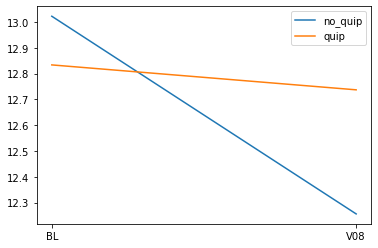

hvlt_discrimination


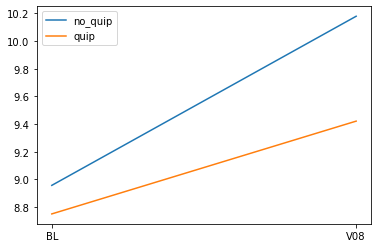

hvlt_immediaterecall


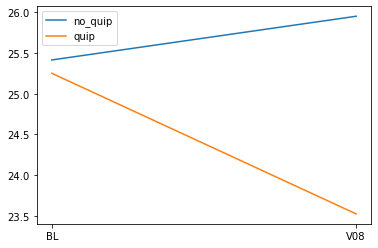

hvlt_retention


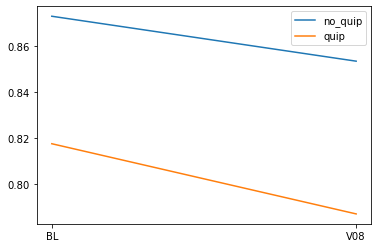

HVLTFPRL


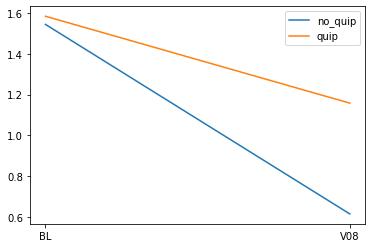

HVLTRDLY


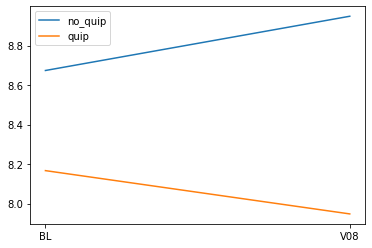

HVLTREC


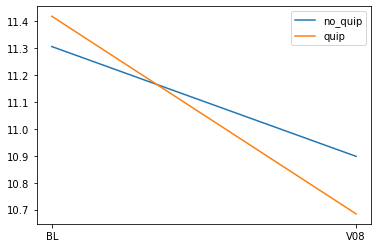

lns


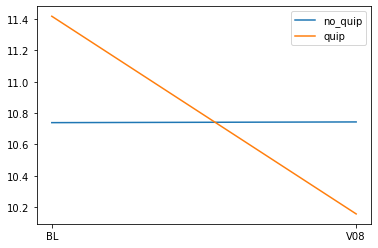

moca


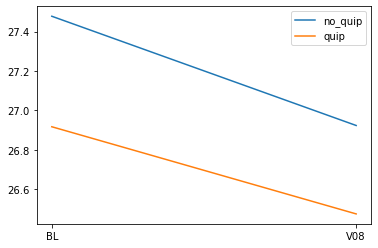

MSEADLG


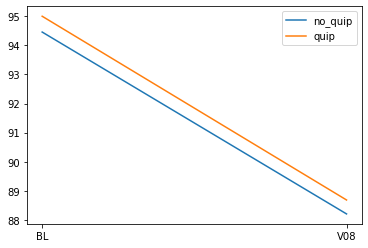

SDMTOTAL


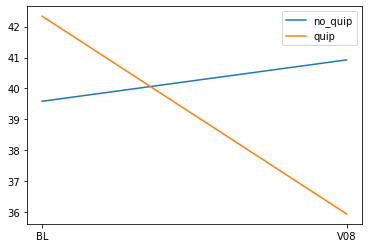

sft


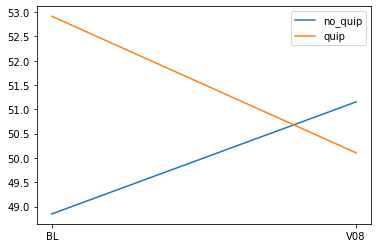

VLTANIM


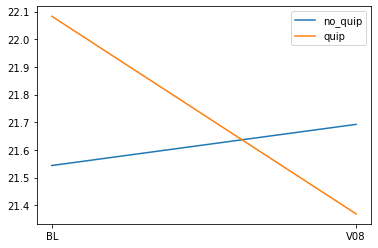

VLTFRUIT


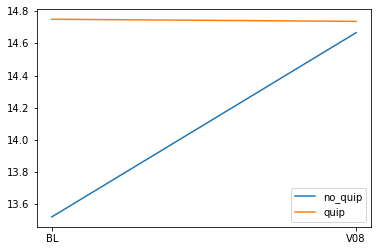

VLTVEG


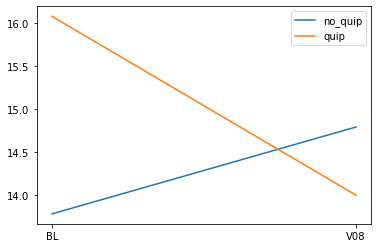

In [50]:
#créer un dataframe avec toutes les moyennes des groupes pour résultas d'interaction
mean_npsy = pandas.DataFrame()
for column in neuropsy:
    npsy_dict = dict()
    BL = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'BL'].index, inplace = False)
    npsy_dict['BL'] = BL.groupby(['quip_any'])[column].mean()
    V08 = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'V08'].index, inplace = False)
    npsy_dict['V08'] = V08.groupby(['quip_any'])[column].mean()
    
    mean_npsy = mean_npsy.append(npsy_dict, ignore_index = True)
    
    # visualisation des résultats
    npsy_df = pandas.DataFrame.from_dict(npsy_dict)
    
    VD_noquip = npsy_df.iloc[0]
    VD_quip = npsy_df.iloc[1]
    VI = ['BL', 'V08']

    fig, ax = plt.subplots()
    ax.plot(VI, VD_noquip, label = 'no_quip')
    ax.plot(VI, VD_quip, label = 'quip')
    ax.legend()
    
    print(column)
    plt.show()

In [52]:
mean_npsy.to_excel('C:\\Users\\p_lor\\OneDrive\\Bureau\\IUGM\\QUIPAD\\mean_npsy.xlsx')

In [41]:
# liste avec toutes les colonnes des données mri
list_mri = list(mri)

In [42]:
# Enlever toutes les colonnes des données mri avec des Nan
pd_bl_v08 = pd_bl_v08.drop(['cortex_vol_VolL_DK', 'cortex_vol_VolR_DK', 'wm_hypointensitiesL_VolSeg',
                            'WMhypointensitiesR_VolSeg', 'nonWMhypointensities_VolSeg', 'nonWMhypointensitiesL_VolSeg',
                            'nonWMhypointensitiesR_VolSeg'], axis=1)

In [43]:
# Enlever les noms de colonnes avec des Nan de la liste mri
list_mri.remove('cortex_vol_VolL_DK')
list_mri.remove('cortex_vol_VolR_DK')
list_mri.remove('PATNO')
list_mri.remove('EVENT_ID')
list_mri.remove('wm_hypointensitiesL_VolSeg')
list_mri.remove('WMhypointensitiesR_VolSeg')
list_mri.remove('nonWMhypointensities_VolSeg')
list_mri.remove('nonWMhypointensitiesL_VolSeg')
list_mri.remove('nonWMhypointensitiesR_VolSeg')

In [32]:
# ANOVA mixte des régions cérébrales, imprimer résultats significatifs pour VI quip_any
result_quip = list()
for i in list_mri:
    result = pg.mixed_anova(data = pd_bl_v08, dv = i, within = 'EVENT_ID', subject = 'PATNO', between = 'quip_any', effsize = 'n2')
    if result['p-unc'].iloc[0] <= 0.05:
        result_quip.append(i)
        print(i)
        print(result)

fimbria_HIPL
        Source           SS  DF1  DF2           MS         F     p-unc  \
0     quip_any  4844.541256    1   39  4844.541256  4.702640  0.036277   
1     EVENT_ID   600.472143    1   39   600.472143  6.871875  0.012421   
2  Interaction   249.869526    1   39   249.869526  2.859537  0.098812   

         n2  eps  
0  0.098307  NaN  
1  0.012185  1.0  
2  0.005070  NaN  
PuA_THAR
        Source           SS  DF1  DF2           MS         F     p-unc  \
0     quip_any  6740.106282    1   39  6740.106282  4.753288  0.035341   
1     EVENT_ID   257.791502    1   39   257.791502  1.259458  0.268616   
2  Interaction     8.953735    1   39     8.953735  0.043744  0.835419   

         n2  eps  
0  0.095888  NaN  
1  0.003667  1.0  
2  0.000127  NaN  
occipital_cuneus_AreaL_DK
        Source             SS  DF1  DF2             MS         F     p-unc  \
0     quip_any  334229.539660    1   39  334229.539660  4.126956  0.049059   
1     EVENT_ID   11239.024390    1   39   11239.02

In [33]:
result_quip

['fimbria_HIPL',
 'PuA_THAR',
 'occipital_cuneus_AreaL_DK',
 'temporal_fusiform_AreaL_DK',
 'temporal_parahippocampal_AreaL_DK',
 'cingulate_posterior_AreaL_DK',
 'cingulate_posterior_VolL_DK',
 'temporal_inferior_AreaR_DK',
 'parietal_postcentral_AreaR_DK',
 'cingulate_posterior_AreaR_DK',
 'cingulate_posterior_VolR_DK',
 'frontal_parsopercularis_CurvR_DK',
 'cingulate_posterior_CurvR_DK',
 'cingulate_posterior_FoldIndR_DK']

In [34]:
# ANOVA mixte pour régions cérébrales, imprimer résultats significatifs pour VI EVENT_ID
result_event = list()
for i in list_mri:
    result = pg.mixed_anova(data = pd_bl_v08, dv = i, within = 'EVENT_ID', subject = 'PATNO', between = 'quip_any', effsize = 'n2')
    if result['p-unc'].iloc[1] <= 0.05:
        result_event.append(i)
        print(i)
        print(result)

medulla_Brainstem
        Source            SS  DF1  DF2            MS         F     p-unc  \
0     quip_any  1.020596e+05    1   39  1.020596e+05  0.223451  0.639058   
1     EVENT_ID  1.118505e+06    1   39  1.118505e+06  4.499981  0.040305   
2  Interaction  4.060070e+05    1   39  4.060070e+05  1.633451  0.208781   

         n2  eps  
0  0.003503  NaN  
1  0.038393  1.0  
2  0.013936  NaN  
scp_Brainstem
        Source           SS  DF1  DF2           MS         F     p-unc  \
0     quip_any  4973.109319    1   39  4973.109319  1.243685  0.271587   
1     EVENT_ID  8311.051847    1   39  8311.051847  7.014642  0.011610   
2  Interaction  2253.526815    1   39  2253.526815  1.902008  0.175712   

         n2  eps  
0  0.022844  NaN  
1  0.038178  1.0  
2  0.010352  NaN  
subiculum-head_HIPL
        Source           SS  DF1  DF2           MS         F     p-unc  \
0     quip_any  1457.472001    1   39  1457.472001  0.878675  0.354334   
1     EVENT_ID   332.361709    1   39   332.36

ca4-head_HIPR
        Source          SS  DF1  DF2          MS          F     p-unc  \
0     quip_any  352.092738    1   39  352.092738   0.671405  0.417542   
1     EVENT_ID  275.713034    1   39  275.713034  11.383833  0.001686   
2  Interaction    4.660361    1   39    4.660361   0.192420  0.663330   

         n2  eps  
0  0.015983  NaN  
1  0.012516  1.0  
2  0.000212  NaN  
fimbria_HIPR
        Source           SS  DF1  DF2           MS         F     p-unc  \
0     quip_any  3487.873714    1   39  3487.873714  3.034158  0.089412   
1     EVENT_ID   579.396929    1   39   579.396929  8.391631  0.006152   
2  Interaction    35.819742    1   39    35.819742  0.518791  0.475653   

         n2  eps  
0  0.067558  NaN  
1  0.011223  1.0  
2  0.000694  NaN  
ca3-head_HIPR
        Source           SS  DF1  DF2           MS          F     p-unc  \
0     quip_any  1517.755423    1   39  1517.755423   2.463351  0.124609   
1     EVENT_ID   542.564451    1   39   542.564451  20.504045  0.00

WholeAmygdala_AMYR
        Source            SS  DF1  DF2            MS          F     p-unc  \
0     quip_any  11739.350728    1   39  11739.350728   0.131729  0.718606   
1     EVENT_ID  45784.127616    1   39  45784.127616  14.437280  0.000496   
2  Interaction  20681.103712    1   39  20681.103712   6.521450  0.014680   

         n2  eps  
0  0.003192  NaN  
1  0.012450  1.0  
2  0.005624  NaN  
MDl_THAL
        Source           SS  DF1  DF2           MS          F     p-unc  \
0     quip_any  4676.930044    1   39  4676.930044   2.703214  0.108185   
1     EVENT_ID  1438.201239    1   39  1438.201239  10.617141  0.002326   
2  Interaction    10.311009    1   39    10.311009   0.076118  0.784085   

         n2  eps  
0  0.059289  NaN  
1  0.018232  1.0  
2  0.000131  NaN  
MDm_THAL
        Source            SS  DF1  DF2            MS          F     p-unc  \
0     quip_any  41097.476295    1   39  41097.476295   2.036152  0.161555   
1     EVENT_ID  13559.276915    1   39  13559.2

ventricleLateralR_VolSeg
        Source            SS  DF1  DF2            MS          F     p-unc  \
0     quip_any  5.010705e+06    1   39  5.010705e+06   0.027072  0.870159   
1     EVENT_ID  5.228418e+07    1   39  5.228418e+07  30.480920  0.000002   
2  Interaction  8.140391e+05    1   39  8.140391e+05   0.474573  0.494969   

         n2  eps  
0  0.000682  NaN  
1  0.007120  1.0  
2  0.000111  NaN  
ventricleInfLateralR_VolSeg
        Source             SS  DF1  DF2             MS         F     p-unc  \
0     quip_any   22644.429617    1   39   22644.429617  0.057286  0.812091   
1     EVENT_ID  174451.668780    1   39  174451.668780  9.072657  0.004538   
2  Interaction    4312.569728    1   39    4312.569728  0.224283  0.638436   

         n2  eps  
0  0.001384  NaN  
1  0.010658  1.0  
2  0.000263  NaN  
cerebellumWhiteMatterR_VolSeg
        Source            SS  DF1  DF2            MS         F     p-unc  \
0     quip_any  8.722101e+06    1   39  8.722101e+06  1.367552  0.2

volSupraTentorial_VolSeg
        Source            SS  DF1  DF2            MS          F     p-unc  \
0     quip_any  4.108091e+10    1   39  4.108091e+10   1.864080  0.179979   
1     EVENT_ID  4.136645e+09    1   39  4.136645e+09  26.403137  0.000008   
2  Interaction  5.404046e+08    1   39  5.404046e+08   3.449263  0.070843   

         n2  eps  
0  0.045077  NaN  
1  0.004539  1.0  
2  0.000593  NaN  
volSupraTentorialNotVent_VolSeg
        Source            SS  DF1  DF2            MS          F         p-unc  \
0     quip_any  3.867249e+10    1   39  3.867249e+10   1.987096  1.665698e-01   
1     EVENT_ID  6.781432e+09    1   39  6.781432e+09  42.263390  1.044953e-07   
2  Interaction  4.101891e+08    1   39  4.101891e+08   2.556389  1.179206e-01   

         n2  eps  
0  0.047677  NaN  
1  0.008360  1.0  
2  0.000506  NaN  
volMask_VolSeg
        Source            SS  DF1  DF2            MS         F     p-unc  \
0     quip_any  3.184472e+10    1   39  3.184472e+10  0.739752  0.

frontal_parstriangularis_AreaL_DK
        Source             SS  DF1  DF2             MS          F     p-unc  \
0     quip_any  191051.846895    1   39  191051.846895   2.644253  0.111980   
1     EVENT_ID   27769.280488    1   39   27769.280488  11.159862  0.001851   
2  Interaction    7175.832958    1   39    7175.832958   2.883809  0.097440   

         n2  eps  
0  0.060828  NaN  
1  0.008841  1.0  
2  0.002285  NaN  
parietal_precuneus_AreaL_DK
        Source             SS  DF1  DF2             MS          F     p-unc  \
0     quip_any  651461.136298    1   39  651461.136298   1.030459  0.316307   
1     EVENT_ID   70185.378049    1   39   70185.378049  14.534070  0.000478   
2  Interaction    2472.172371    1   39    2472.172371   0.511940  0.478562   

         n2  eps  
0  0.025479  NaN  
1  0.002745  1.0  
2  0.000097  NaN  
parietal_superior_AreaL_DK
        Source            SS  DF1  DF2            MS         F     p-unc  \
0     quip_any   4644.878100    1   39   4644.878

parietal_precuneus_VolL_DK
        Source            SS  DF1  DF2            MS          F     p-unc  \
0     quip_any  4.123332e+06    1   39  4.123332e+06   0.841632  0.364569   
1     EVENT_ID  7.951905e+05    1   39  7.951905e+05  14.207703  0.000542   
2  Interaction  5.840016e+02    1   39  5.840016e+02   0.010434  0.919162   

         n2  eps  
0  0.020807  NaN  
1  0.004013  1.0  
2  0.000003  NaN  
parietal_superior_VolL_DK
        Source             SS  DF1  DF2             MS         F     p-unc  \
0     quip_any   54572.823581    1   39   54572.823581  0.007580  0.931065   
1     EVENT_ID  724552.000000    1   39  724552.000000  8.566047  0.005687   
2  Interaction  118111.094538    1   39  118111.094538  1.396373  0.244487   

         n2  eps  
0  0.000192  NaN  
1  0.002543  1.0  
2  0.000414  NaN  
temporal_superior_VolL_DK
        Source            SS  DF1  DF2            MS          F         p-unc  \
0     quip_any  1.414267e+06    1   39  1.414267e+06   0.298968  5

occipital_cuneus_AreaR_DK
        Source             SS  DF1  DF2             MS         F     p-unc  \
0     quip_any  433158.190664    1   39  433158.190664  3.880639  0.055977   
1     EVENT_ID   13063.719512    1   39   13063.719512  7.129291  0.011000   
2  Interaction       0.143933    1   39       0.143933  0.000079  0.992974   

             n2  eps  
0  8.892814e-02  NaN  
1  2.682005e-03  1.0  
2  2.954974e-08  NaN  
temporal_fusiform_AreaR_DK
        Source             SS  DF1  DF2             MS         F     p-unc  \
0     quip_any  922635.323273    1   39  922635.323273  2.688015  0.109149   
1     EVENT_ID  141889.280488    1   39  141889.280488  6.726358  0.013310   
2  Interaction    3253.994722    1   39    3253.994722  0.154258  0.696638   

         n2  eps  
0  0.060394  NaN  
1  0.009288  1.0  
2  0.000213  NaN  
parietal_inferior_AreaR_DK
        Source             SS  DF1  DF2             MS          F     p-unc  \
0     quip_any    6541.678674    1   39    6541

occipital_lateral_VolR_DK
        Source            SS  DF1  DF2            MS          F     p-unc  \
0     quip_any  6.667098e+05    1   39  6.667098e+05   0.064616  0.800679   
1     EVENT_ID  2.965522e+06    1   39  2.965522e+06  12.613491  0.001019   
2  Interaction  9.467228e+04    1   39  9.467228e+04   0.402677  0.529415   

         n2  eps  
0  0.001605  NaN  
1  0.007141  1.0  
2  0.000228  NaN  
frontal_orbitolateral_VolR_DK
        Source            SS  DF1  DF2            MS         F     p-unc  \
0     quip_any  1.472746e+06    1   39  1.472746e+06  1.038507  0.314449   
1     EVENT_ID  1.175526e+06    1   39  1.175526e+06  6.061061  0.018345   
2  Interaction  1.440581e+05    1   39  1.440581e+05  0.742770  0.394043   

         n2  eps  
0  0.022429  NaN  
1  0.017902  1.0  
2  0.002194  NaN  
occipital_lingual_VolR_DK
        Source            SS  DF1  DF2            MS          F     p-unc  \
0     quip_any  1.388591e+04    1   39  1.388591e+04   0.005827  0.939545  

In [35]:
result_event

['medulla_Brainstem',
 'scp_Brainstem',
 'subiculum-head_HIPL',
 'ca1-head_HIPL',
 'molecularLayerHP-head_HIPL',
 'gcmldg-head_HIPL',
 'ca4-head_HIPL',
 'fimbria_HIPL',
 'ca3-head_HIPL',
 'wholeHippocampus-body_HIPL',
 'wholeHippocampus-head_HIPL',
 'wholeHippocampus_HIPL',
 'hippocampal-tail_HIPR',
 'subiculum-body_HIPR',
 'ca1-body_HIPR',
 'presubiculum-head_HIPR',
 'ca1-head_HIPR',
 'presubiculum-body_HIPR',
 'molecularLayerHP-head_HIPR',
 'molecularLayerHP-body_HIPR',
 'gcmldg-head_HIPR',
 'ca4-head_HIPR',
 'fimbria_HIPR',
 'ca3-head_HIPR',
 'hata_HIPR',
 'wholeHippocampus-body_HIPR',
 'wholeHippocampus-head_HIPR',
 'wholeHippocampus_HIPR',
 'Lateral-nucleus_AMYL',
 'Basal-nucleus_AMYL',
 'Accessory-Basal-nucleus_AMYL',
 'Anterior-amygdaloid-area-AAA_AMYL',
 'Central-nucleus_AMYL',
 'Medial-nucleus_AMYL',
 'Cortical-nucleus_AMYL',
 'Corticoamygdaloid-transitio_AMYL',
 'WholeAmygdala_AMYL',
 'Lateral-nucleus_AMYR',
 'Basal-nucleus_AMYR',
 'Accessory-Basal-nucleus_AMYR',
 'Anterior-a

In [44]:
# ANOVA mixte pour régions cérébrales, imprimer résultats significatifs pour l'interaction
result_interaction = list()
for i in list_mri:
    result = pg.mixed_anova(data = pd_bl_v08, dv = i, within = 'EVENT_ID', subject = 'PATNO', between = 'quip_any', effsize = 'n2')
    if result['p-unc'].iloc[2] <= 0.05:
        result_interaction.append(i)
        print(i)
        print(result)

Lateral-nucleus_AMYR
        Source           SS  DF1  DF2           MS          F     p-unc  \
0     quip_any  1089.528925    1   39  1089.528925   0.102302  0.750791   
1     EVENT_ID  6840.713186    1   39  6840.713186  10.508469  0.002435   
2  Interaction  2966.267673    1   39  2966.267673   4.556679  0.039131   

         n2  eps  
0  0.002412  NaN  
1  0.015146  1.0  
2  0.006568  NaN  
Basal-nucleus_AMYR
        Source           SS  DF1  DF2           MS          F     p-unc  \
0     quip_any  1076.298571    1   39  1076.298571   0.185284  0.669241   
1     EVENT_ID  2526.418246    1   39  2526.418246  12.848942  0.000927   
2  Interaction  1336.692678    1   39  1336.692678   6.798196  0.012863   

         n2  eps  
0  0.004500  NaN  
1  0.010564  1.0  
2  0.005589  NaN  
Anterior-amygdaloid-area-AAA_AMYR
        Source         SS  DF1  DF2         MS         F     p-unc        n2  \
0     quip_any   7.501999    1   39   7.501999  0.053393  0.818468  0.001245   
1     EVENT_

In [45]:
result_interaction

['Lateral-nucleus_AMYR',
 'Basal-nucleus_AMYR',
 'Anterior-amygdaloid-area-AAA_AMYR',
 'Corticoamygdaloid-transitio_AMYR',
 'WholeAmygdala_AMYR',
 'Pt_THAL',
 'VM_THAL',
 'volBrainSegtoeTIV_VolSeg',
 'cingulate_isthmus_AreaL_DK',
 'temporal_parahippocampal_AreaL_DK',
 'occipital_lingual_VolL_DK',
 'temporal_parahippocampal_CurvL_DK',
 'cingulate_isthmus_FoldIndL_DK',
 'temporal_parahippocampal_FoldIndL_DK',
 'cortex_area_AreaR_DK',
 'temporal_middle_VolR_DK',
 'temporal_superior_VolR_DK',
 'insula_VolR_DK',
 'cingulate_anterior_caudal_FoldIndR_DK',
 'parietal_precuneus_FoldIndR_DK']

In [34]:
# ANOVA mixte avec les régions significatives suite à la corrélation
for R in regions:
    print(R)
    print(pg.mixed_anova(data = pd_bl_v08, dv = R, within = 'EVENT_ID', subject = 'PATNO', between = 'quip_any', effsize = 'n2'))

ca3-head_HIPR
        Source           SS  DF1  DF2           MS          F     p-unc  \
0     quip_any  1517.755423    1   39  1517.755423   2.463351  0.124609   
1     EVENT_ID   542.564451    1   39   542.564451  20.504045  0.000055   
2  Interaction    27.715183    1   39    27.715183   1.047384  0.312417   

         n2  eps  
0  0.055904  NaN  
1  0.019984  1.0  
2  0.001021  NaN  
MGN_THAR
        Source          SS  DF1  DF2          MS         F     p-unc  \
0     quip_any    6.432272    1   39    6.432272  0.008413  0.927388   
1     EVENT_ID  268.356036    1   39  268.356036  2.158816  0.149775   
2  Interaction  101.885921    1   39  101.885921  0.819631  0.370847   

         n2  eps  
0  0.000184  NaN  
1  0.007658  1.0  
2  0.002908  NaN  
accumbensAreaL_VolSeg
        Source           SS  DF1  DF2           MS         F     p-unc  \
0     quip_any  2824.284978    1   39  2824.284978  0.120381  0.730487   
1     EVENT_ID  4432.785488    1   39  4432.785488  1.388303  0.2

        Source        SS  DF1  DF2        MS         F     p-unc        n2  \
0     quip_any  0.000016    1   39  0.000016  0.060154  0.807539  0.001323   
1     EVENT_ID  0.000117    1   39  0.000117  2.842501  0.099787  0.009573   
2  Interaction  0.000002    1   39  0.000002  0.046803  0.829850  0.000158   

   eps  
0  NaN  
1  1.0  
2  NaN  
frontal_parsorbitalis_CurvL_DK
        Source        SS  DF1  DF2        MS         F     p-unc        n2  \
0     quip_any  0.000492    1   39  0.000492  1.188441  0.282334  0.024870   
1     EVENT_ID  0.000022    1   39  0.000022  0.276733  0.601829  0.001086   
2  Interaction  0.000095    1   39  0.000095  1.219167  0.276290  0.004787   

   eps  
0  NaN  
1  1.0  
2  NaN  
cingulate_posterior_CurvL_DK
        Source        SS  DF1  DF2        MS         F     p-unc        n2  \
0     quip_any  0.000416    1   39  0.000416  2.153545  0.150260  0.048334   
1     EVENT_ID  0.000129    1   39  0.000129  9.622184  0.003566  0.015025   
2  Inter

        Source            SS  DF1  DF2            MS         F     p-unc  \
0     quip_any  95378.393933    1   39  95378.393933  1.389100  0.245698   
1     EVENT_ID  21734.451220    1   39  21734.451220  2.187965  0.147126   
2  Interaction   4835.099201    1   39   4835.099201  0.486740  0.489524   

         n2  eps  
0  0.029926  NaN  
1  0.006819  1.0  
2  0.001517  NaN  
frontal_orbitomedial_CurvR_DK
        Source            SS  DF1  DF2            MS         F     p-unc  \
0     quip_any  5.436052e-05    1   39  5.436052e-05  0.226414  0.636851   
1     EVENT_ID  3.297561e-05    1   39  3.297561e-05  0.881271  0.353632   
2  Interaction  7.134659e-07    1   39  7.134659e-07  0.019067  0.890884   

         n2  eps  
0  0.004982  NaN  
1  0.003022  1.0  
2  0.000065  NaN  
frontal_paracentral_CurvR_DK
        Source        SS  DF1  DF2        MS         F     p-unc        n2  \
0     quip_any  0.000226    1   39  0.000226  1.131515  0.293995  0.020348   
1     EVENT_ID  0.00006

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [103]:
pd_bl_v08

,SITE,PATNO,APPRDX,EVENT_ID,YEAR,visit_date,ST_startdate,ST_year1,ST_year2,ST_year3,...,frontal_superior_FoldIndR_DK,parietal_superior_FoldIndR_DK,temporal_superior_FoldIndR_DK,parietal_supramarginal_FoldIndR_DK,frontal_pole_FoldIndR_DK,temporal_pole_FoldIndR_DK,temporal_transverse_FoldIndR_DK,insula_FoldIndR_DK,eTIV,duplicated
35,13,3107,1,BL,0,APR2011,OCT2011,1,1,1,...,100,79,48,58,11,11,6,30.0,1.719433e+06,True
36,13,3108,1,BL,0,APR2011,OCT2011,1,1,1,...,103,78,32,55,19,9,6,36.0,1.254948e+06,True
39,13,3116,1,BL,0,NOV2011,MAY2012,1,1,1,...,87,79,46,53,8,18,6,30.0,1.508696e+06,True
40,13,3118,1,BL,0,JAN2012,OCT2012,1,1,1,...,141,93,49,64,12,12,7,41.0,1.406433e+06,True
42,13,3120,1,BL,0,MAY2012,AUG2012,1,1,1,...,95,72,53,70,10,10,6,32.0,1.245740e+06,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,28,4029,1,V08,3,OCT2015,AUG2013,1,1,1,...,132,109,73,86,20,11,7,59.0,2.056844e+06,True
424,28,4030,1,V08,3,JAN2016,AUG2015,0,0,1,...,128,113,59,66,10,12,9,42.0,1.774909e+06,True
425,28,4034,1,V08,3,APR2016,OCT2013,1,1,1,...,103,89,44,58,12,12,6,37.0,1.781139e+06,True
426,28,4035,1,V08,3,MAR2016,JUN2014,0,1,1,...,95,76,43,69,6,9,6,39.0,1.623987e+06,True


In [105]:
Lateral_nucleus_AMYR = pandas.DataFrame()
BL = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'BL'].index, inplace = False)
Lateral_nucleus_AMYR['Lateral-nucleus_AMYR_BL'] = BL.groupby(['quip_any'])['Lateral-nucleus_AMYR'].mean()
V08 = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'V08'].index, inplace = False)
Lateral_nucleus_AMYR['Lateral-nucleus_AMYR_V08'] = V08.groupby(['quip_any'])['Lateral-nucleus_AMYR'].mean()

In [106]:
Lateral_nucleus_AMYR

,Lateral-nucleus_AMYR_BL,Lateral-nucleus_AMYR_V08
quip_any,,
0.0,693.220857,661.166875
1.0,672.910495,679.490285


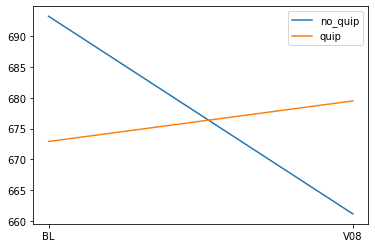

In [122]:
#https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
VD_noquip = Lateral_nucleus_AMYR.iloc[0]
VD_quip = Lateral_nucleus_AMYR.iloc[1]
VI = ['BL', 'V08']

fig, ax = plt.subplots()
ax.plot(VI, VD_noquip, label = 'no_quip')
ax.plot(VI, VD_quip, label = 'quip')
ax.legend()

plt.show()

Lateral-nucleus_AMYR


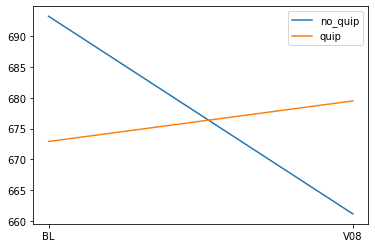

Basal-nucleus_AMYR


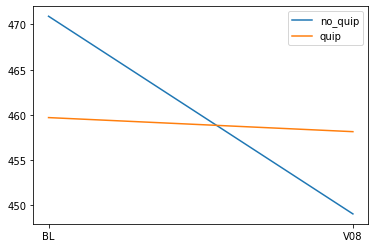

Anterior-amygdaloid-area-AAA_AMYR


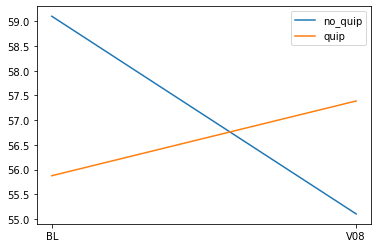

Corticoamygdaloid-transitio_AMYR


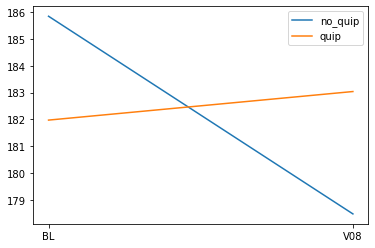

WholeAmygdala_AMYR


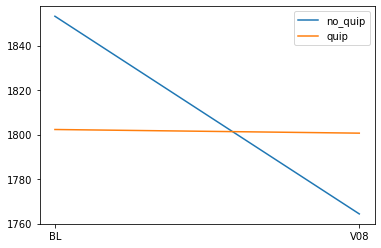

Pt_THAL


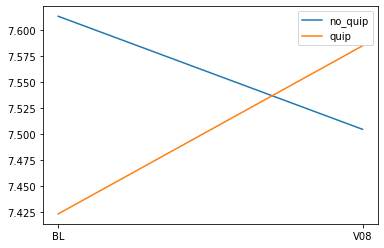

VM_THAL


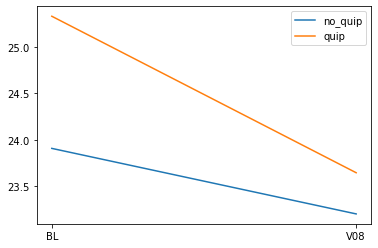

volBrainSegtoeTIV_VolSeg


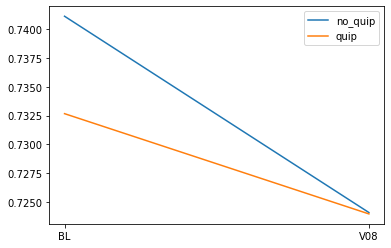

cingulate_isthmus_AreaL_DK


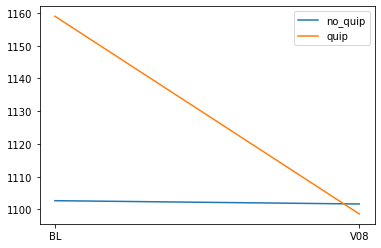

temporal_parahippocampal_AreaL_DK


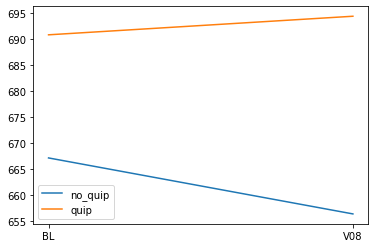

occipital_lingual_VolL_DK


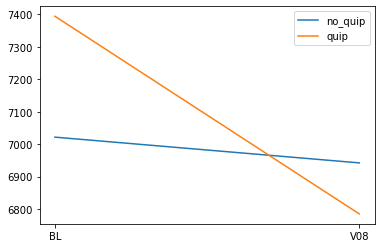

temporal_parahippocampal_CurvL_DK


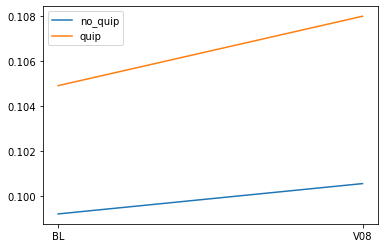

cingulate_isthmus_FoldIndL_DK


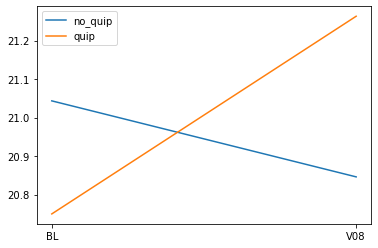

temporal_parahippocampal_FoldIndL_DK


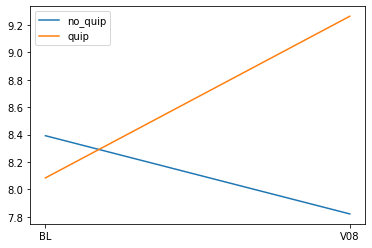

cortex_area_AreaR_DK


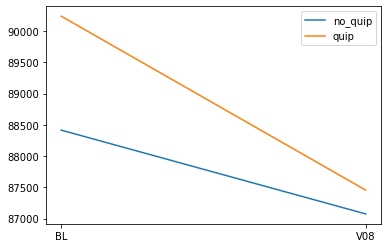

temporal_middle_VolR_DK


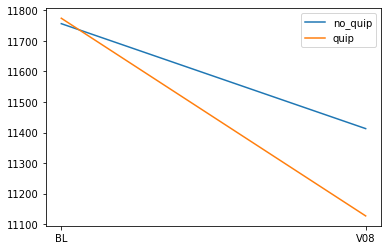

temporal_superior_VolR_DK


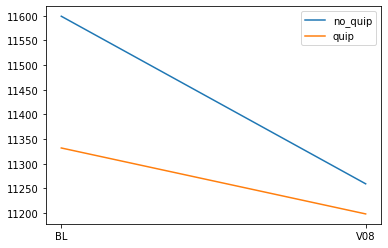

insula_VolR_DK


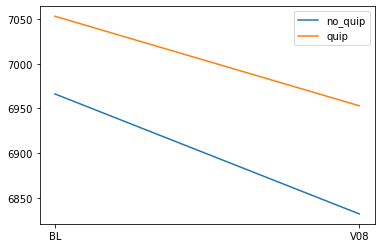

cingulate_anterior_caudal_FoldIndR_DK


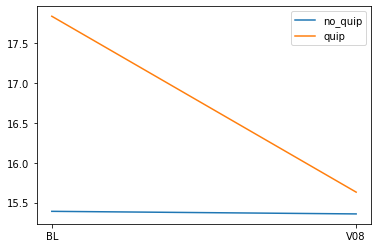

parietal_precuneus_FoldIndR_DK


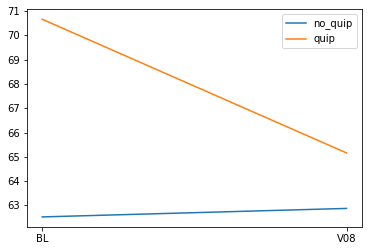

In [124]:
#créer un dataframe avec toutes les moyennes des groupes pour résultas d'interaction
mean_interaction = pandas.DataFrame()
for region in result_interaction:
    region_dict = dict()
    BL = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'BL'].index, inplace = False)
    region_dict['BL'] = BL.groupby(['quip_any'])[region].mean()
    V08 = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'V08'].index, inplace = False)
    region_dict['V08'] = V08.groupby(['quip_any'])[region].mean()
    
    mean_interaction = mean_interaction.append(region_dict, ignore_index = True)
    
    # visualisation des résultats
    region_df = pandas.DataFrame.from_dict(region_dict)
    
    VD_noquip = region_df.iloc[0]
    VD_quip = region_df.iloc[1]
    VI = ['BL', 'V08']

    fig, ax = plt.subplots()
    ax.plot(VI, VD_noquip, label = 'no_quip')
    ax.plot(VI, VD_quip, label = 'quip')
    ax.legend()
    
    print(region)
    plt.show()
    #fig.savefig('C:\\Users\\p_lor\\OneDrive\\Bureau\\IUGM\\QUIPAD\\region.png')

In [118]:
mean_interaction

,BL,V08
0,quip_any 0.0 693.220857 1.0 672.910495 N...,quip_any 0.0 661.166875 1.0 679.490285 N...
1,quip_any 0.0 470.911053 1.0 459.710249 N...,quip_any 0.0 449.064713 1.0 458.154738 N...
2,quip_any 0.0 59.101940 1.0 55.874394 Nam...,quip_any 0.0 55.101526 1.0 57.387311 Nam...
3,quip_any 0.0 185.838848 1.0 181.977587 N...,quip_any 0.0 178.489468 1.0 183.039575 N...
4,quip_any 0.0 1853.143175 1.0 1802.278370...,quip_any 0.0 1764.366823 1.0 1800.636825...
5,quip_any 0.0 7.613027 1.0 7.422962 Name:...,quip_any 0.0 7.504307 1.0 7.584586 Name:...
6,quip_any 0.0 23.906809 1.0 25.329144 Nam...,quip_any 0.0 23.201456 1.0 23.644810 Nam...
7,quip_any 0.0 0.741098 1.0 0.732664 Name:...,quip_any 0.0 0.724105 1.0 0.723985 Name:...
8,quip_any 0.0 1102.673913 1.0 1159.000000...,quip_any 0.0 1101.666667 1.0 1098.631579...
9,quip_any 0.0 667.108696 1.0 690.750000 N...,quip_any 0.0 656.358974 1.0 694.315789 N...


In [119]:
mean_interaction.to_excel('C:\\Users\\p_lor\\OneDrive\\Bureau\\IUGM\\QUIPAD\\mean_interaction.xlsx')

In [125]:
#créer un dataframe avec toutes les moyennes à BL et à V08
mean_int_event = pandas.DataFrame()
for region in result_interaction:
    region_dict = dict()
    BL = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'BL'].index, inplace = False)
    region_dict['BL'] = BL[region].mean()
    V08 = pd_bl_v08.drop(pd_bl_v08[pd_bl_v08['EVENT_ID'] != 'V08'].index, inplace = False)
    region_dict['V08'] = V08[region].mean()
    
    mean_int_event = mean_int_event.append(region_dict, ignore_index = True)

In [126]:
mean_int_event

,BL,V08
0,689.018713,667.169371
1,468.593646,452.042480
2,58.434171,55.850318
3,185.039966,179.980021
4,1842.619423,1776.248375
5,7.573703,7.530605
6,24.201085,23.346693
7,0.739353,0.724065
8,1114.327586,1100.672414
9,672.000000,668.793103
